In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [53]:
data= pd.read_csv('Amazon Sales data.csv')


In [54]:
data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [55]:
data.tail()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
95,Sub-Saharan Africa,Mali,Clothes,Online,M,7/26/2011,512878119,9/3/2011,888,109.28,35.84,97040.64,31825.92,65214.72
96,Asia,Malaysia,Fruits,Offline,L,11/11/2011,810711038,12/28/2011,6267,9.33,6.92,58471.11,43367.64,15103.47
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,6/1/2016,728815257,6/29/2016,1485,154.06,90.93,228779.10,135031.05,93748.05
98,North America,Mexico,Personal Care,Offline,M,7/30/2015,559427106,8/8/2015,5767,81.73,56.67,471336.91,326815.89,144521.02
99,Sub-Saharan Africa,Mozambique,Household,Offline,L,2/10/2012,665095412,2/15/2012,5367,668.27,502.54,3586605.09,2697132.18,889472.91


In [56]:
data.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
      dtype='object')

In [57]:
data.shape

(100, 14)

In [58]:
data.size

1400

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


In [60]:
data.describe()

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,1.000000e+02,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,5.550204e+08,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05
std,2.606153e+08,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05
min,1.146066e+08,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03
25%,3.389225e+08,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05
50%,5.577086e+08,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05
75%,7.907551e+08,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05
max,9.940222e+08,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06


In [61]:
data.isnull().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

In [62]:
data.dtypes

Region             object
Country            object
Item Type          object
Sales Channel      object
Order Priority     object
Order Date         object
Order ID            int64
Ship Date          object
Units Sold          int64
Unit Price        float64
Unit Cost         float64
Total Revenue     float64
Total Cost        float64
Total Profit      float64
dtype: object

In [63]:
data = data.astype({'Ship Date': 'datetime64[ns]','Order Date':'datetime64[ns]'})


In [64]:
data.dtypes

Region                    object
Country                   object
Item Type                 object
Sales Channel             object
Order Priority            object
Order Date        datetime64[ns]
Order ID                   int64
Ship Date         datetime64[ns]
Units Sold                 int64
Unit Price               float64
Unit Cost                float64
Total Revenue            float64
Total Cost               float64
Total Profit             float64
dtype: object

<Axes: >

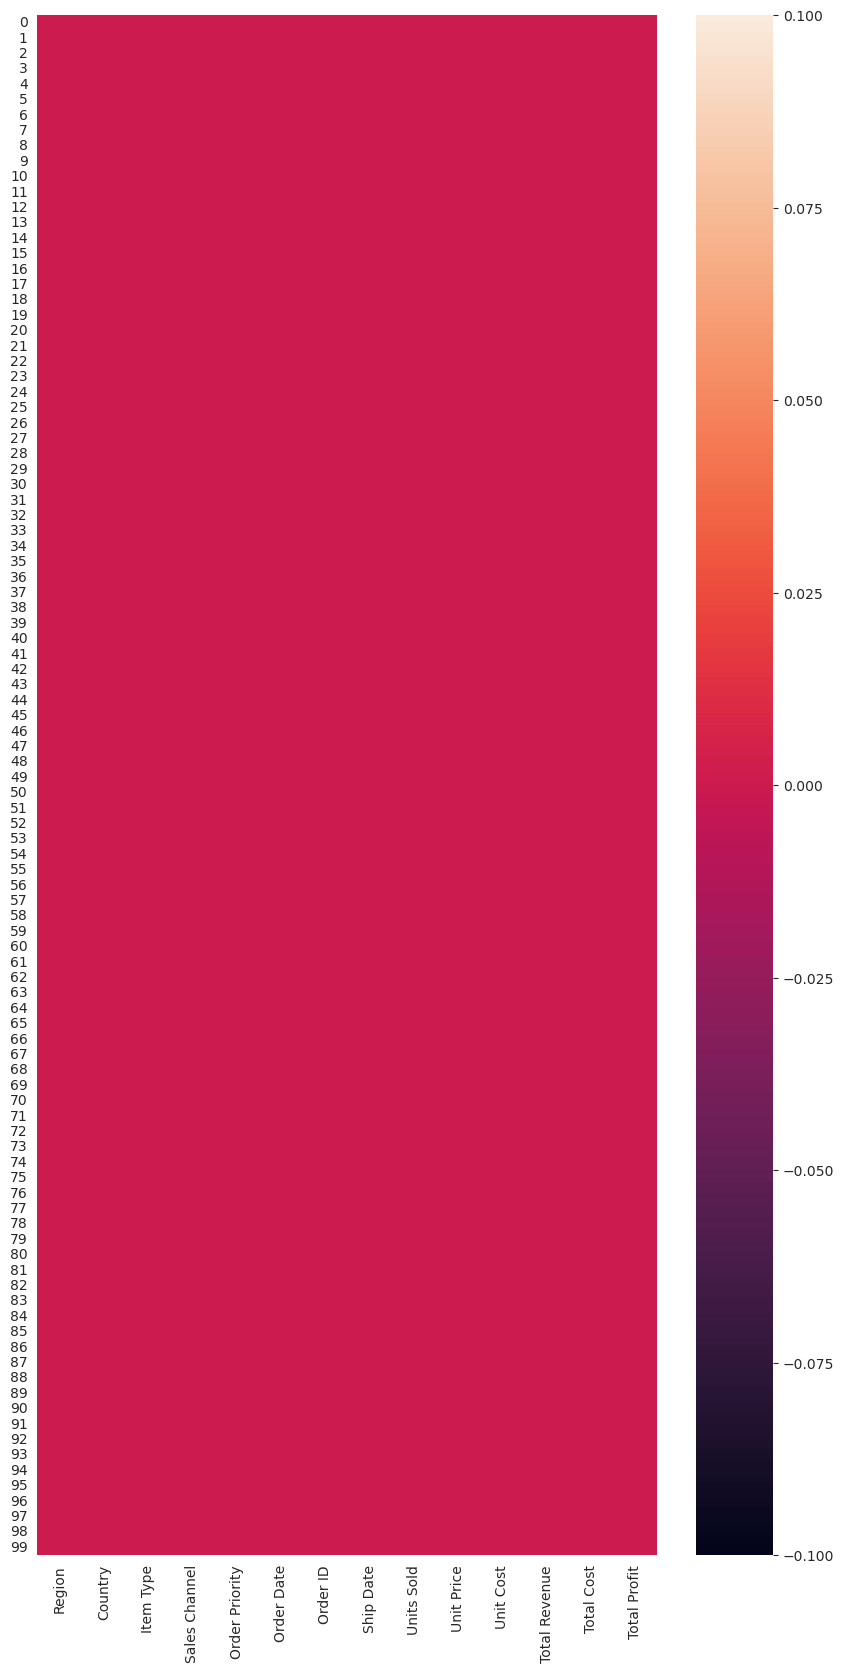

In [65]:
plt.figure(figsize=(10,20))
sns.heatmap(data.isnull()) # NO ANY NULL VALUE PRESENT IN OUR DATASET.

In [66]:
test = data.iloc[0, 12] = np.nan   # ADDING NULL VALUE JUST FOR DEMO
test

nan

<Axes: >

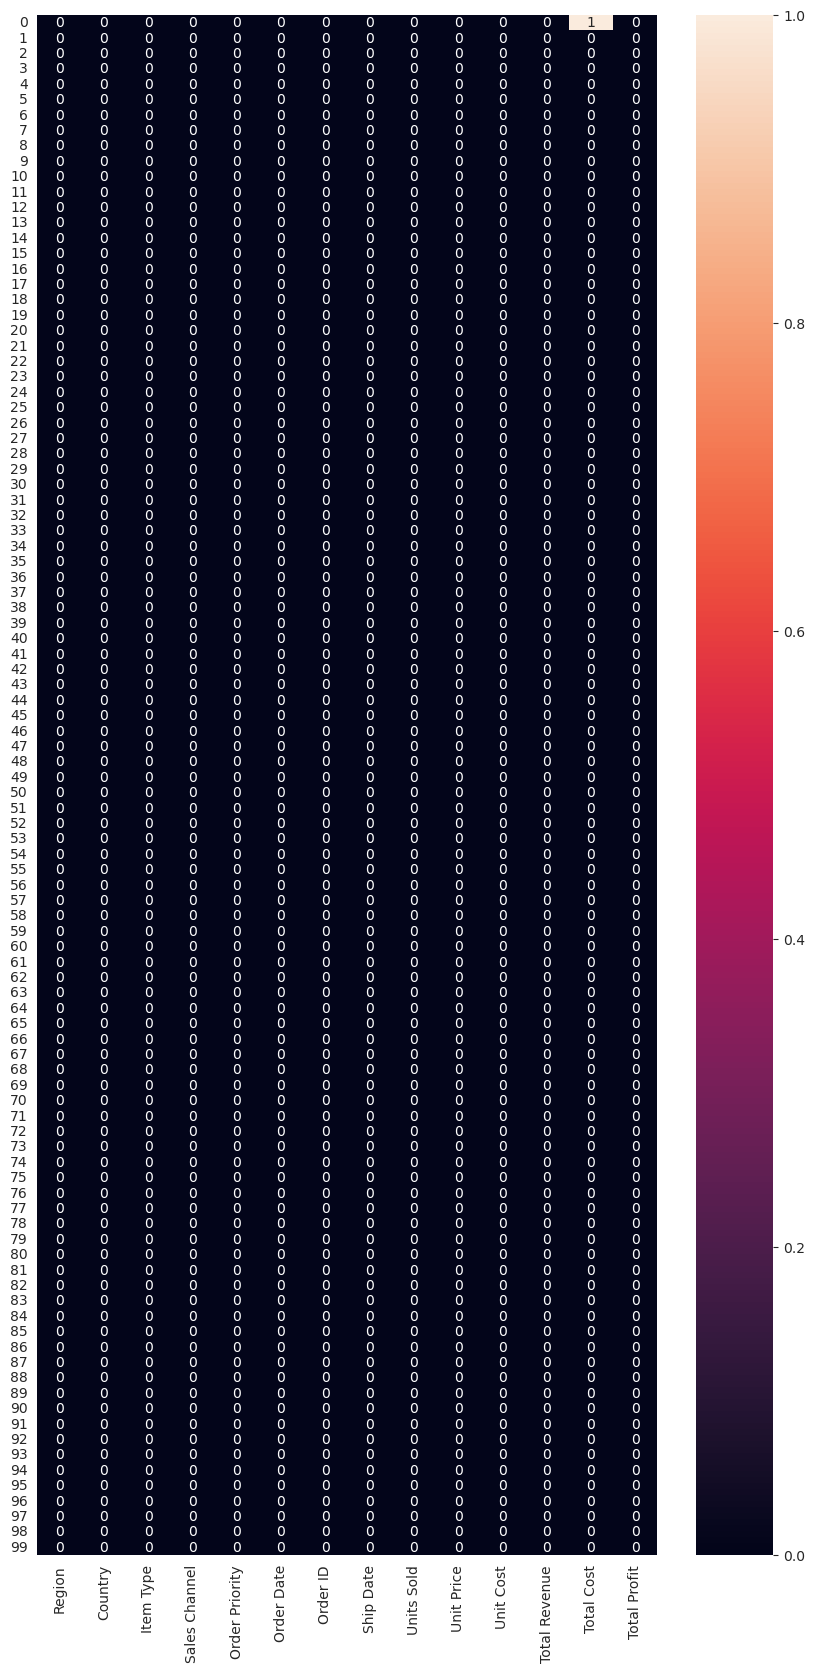

In [67]:
plt.figure(figsize=(10,20))
sns.heatmap(data.isnull(),annot= True) #NULL VALUE FOUND IN 'TOTAL COST' COLUMN

In [68]:
# data = data.fillna(data.mean())   #FILL MEAN WHERE NULL VALUE PRESENT

In [69]:
data['Total Cost']= data['Total Cost'].astype('Float64')
data

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,2010-06-27,9925,255.28,159.42,2533654.00,<NA>,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,2014-07-05,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2013-02-06,5062,651.21,524.96,3296425.02,2657347.52,639077.50
5,Australia and Oceania,Solomon Islands,Baby Food,Online,C,2015-02-04,547995746,2015-02-21,2974,255.28,159.42,759202.72,474115.08,285087.64
6,Sub-Saharan Africa,Angola,Household,Offline,M,2011-04-23,135425221,2011-04-27,4187,668.27,502.54,2798046.49,2104134.98,693911.51
7,Sub-Saharan Africa,Burkina Faso,Vegetables,Online,H,2012-07-17,871543967,2012-07-27,8082,154.06,90.93,1245112.92,734896.26,510216.66
8,Sub-Saharan Africa,Republic of the Congo,Personal Care,Offline,M,2015-07-14,770463311,2015-08-25,6070,81.73,56.67,496101.10,343986.9,152114.20
9,Sub-Saharan Africa,Senegal,Cereal,Online,H,2014-04-18,616607081,2014-05-30,6593,205.70,117.11,1356180.10,772106.23,584073.87


<Axes: >

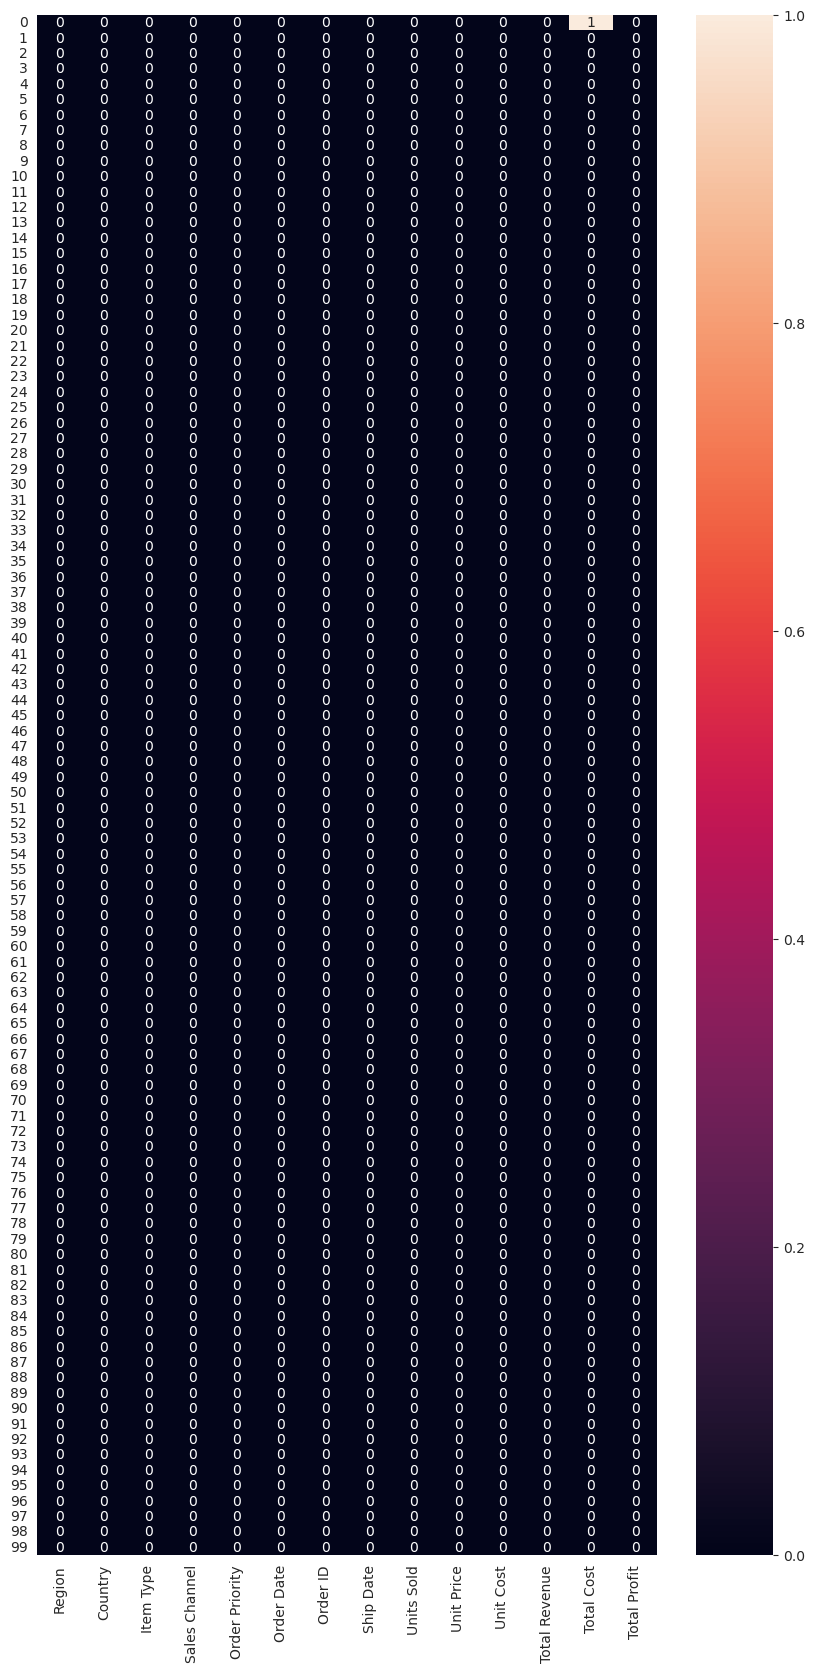

In [70]:
plt.figure(figsize=(10,20))
sns.heatmap(data.isnull(),annot= True)   # NO NULL VALUES

In [71]:
data.head(3)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,2010-06-27,9925,255.28,159.42,2533654.00,<NA>,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75


In [72]:
#Data Analysis:

#Queries:

#Which regions have the highest total sales revenue?

#What is the average unit price and unit cost for each item type?

#Which country has the highest total profit?

#How does the sales channel affect the order priority distribution?

#What is the average order processing time (duration between order and ship dates) for each sales channel?

#Which item types have the highest and lowest total sales?

#How does the order priority vary across different regions?

#What is the correlation between unit price and total profit?

#Are there any seasonal trends or patterns in the sales data?

#How does the number of units sold vary across different countries?

#1- Which regions have the highest total sales revenue?


In [73]:
# df.groupby(data[''])[''].sum()  or .idmax()/ .idmin()
Highest_Total_Revenue= data.groupby(data['Region'])['Total Revenue'].sum()
Highest_Total_Revenue.idxmax()

'Sub-Saharan Africa'

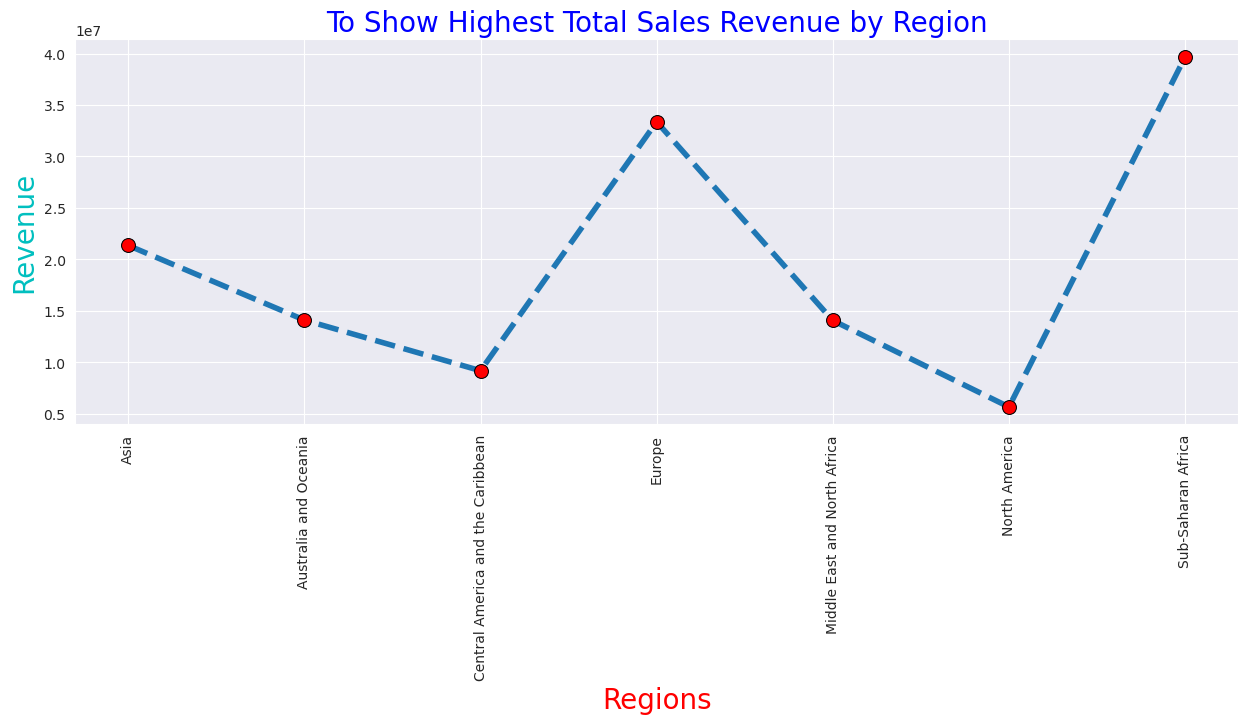

In [74]:
group_data= data.groupby(data['Region'])['Total Revenue'].sum()
sns.set_style('darkgrid')
plt.figure(figsize=(15,5))
sns.lineplot(data= group_data, linestyle= '--' ,linewidth= 4 , marker= 'o', markersize= 10,
             markerfacecolor='red', markeredgecolor='black')

plt.xticks(rotation= 90)
plt.title('To Show Highest Total Sales Revenue by Region', fontsize= 20, color= 'Blue')
plt.xlabel('Regions', fontsize= 20, color= 'red')
plt.ylabel('Revenue', fontsize= 20, color= 'c')
plt.show()


# 1e7 is scientific form. it means 1*10**7= 10,000,000

In [75]:
Avg_Unit_Price= data.groupby(data['Item Type'])['Unit Price'].mean()
Avg_Unit_Cost= data.groupby(data['Item Type'])['Unit Cost'].mean()

Avg_Price_Cost= pd.DataFrame({'Average Unit Price': Avg_Unit_Price,
                              'Average Unit Cost': Avg_Unit_Cost})

Avg_Price_Cost

,Average Unit Price,Average Unit Cost
Item Type,,
Baby Food,255.28,159.42
Beverages,47.45,31.79
Cereal,205.70,117.11
Clothes,109.28,35.84
Cosmetics,437.20,263.33
Fruits,9.33,6.92
Household,668.27,502.54
Meat,421.89,364.69
Office Supplies,651.21,524.96


In [76]:
Total_Profit_By_Comapany= data.groupby(data['Country']) ['Total Profit'].sum()
Highest_Total_Profit_County= Total_Profit_By_Comapany.idxmax()

print("Country with the highest total profit:",Highest_Total_Profit_County)

Country with the highest total profit: Djibouti


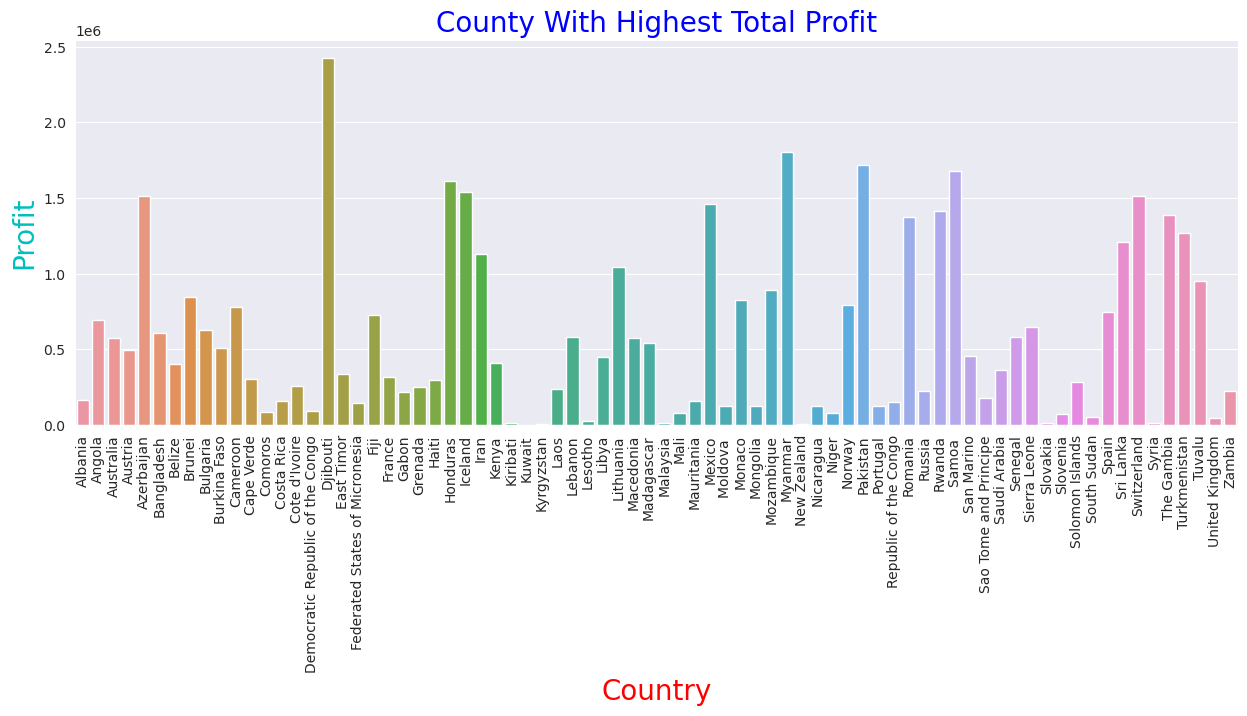

In [77]:
group_data= data.groupby(data['Country']) ['Total Profit'].sum()
sns.set_style('darkgrid')
plt.figure(figsize=(15,5))
sns.barplot(x= group_data.index, y= group_data )

plt.xticks(rotation= 90)
plt.title('County With Highest Total Profit', fontsize= 20, color= 'Blue')
plt.xlabel('Country', fontsize= 20, color= 'red')
plt.ylabel('Profit', fontsize= 20, color= 'c')
plt.show()

In [78]:
Sales_Channel_Order_Priority_Distribution= data.groupby(data['Sales Channel']) ['Order Priority'].value_counts()
Sales_Channel_Order_Priority_Distribution

Sales Channel  Order Priority
Offline        H                 17
               C                 13
               L                 12
               M                  8
Online         L                 15
               H                 13
               M                 13
               C                  9
Name: count, dtype: int64

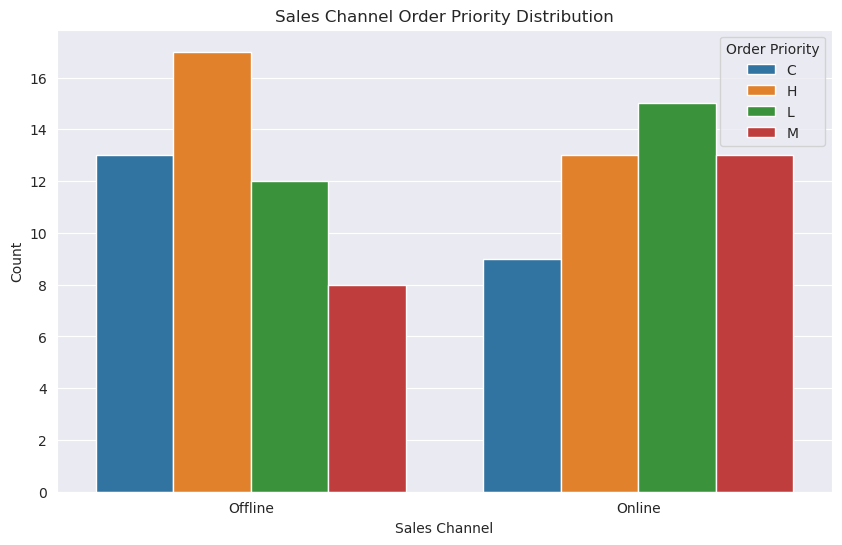

In [79]:
Sales_Channel_Order_Priority_Distribution = data.groupby(['Sales Channel', 'Order Priority'])['Order Priority'].count()

# Reset the index to convert the grouped data into a DataFrame
Sales_Channel_Order_Priority_Distribution = Sales_Channel_Order_Priority_Distribution.reset_index(name='Count')

# Set the style
sns.set_style('darkgrid')

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Sales Channel', y='Count', hue='Order Priority', data=Sales_Channel_Order_Priority_Distribution)

# Add labels and title
plt.xlabel('Sales Channel')
plt.ylabel('Count')
plt.title('Sales Channel Order Priority Distribution')

# Display the plot
plt.show()


In [80]:
data['Processing Time']= data['Ship Date']-data['Order Date']

Avg_Processing_Time= data.groupby(data['Sales Channel'])['Processing Time'].mean()
Avg_Processing_Time

Sales Channel
Offline   23 days 04:48:00
Online    23 days 12:28:48
Name: Processing Time, dtype: timedelta64[ns]

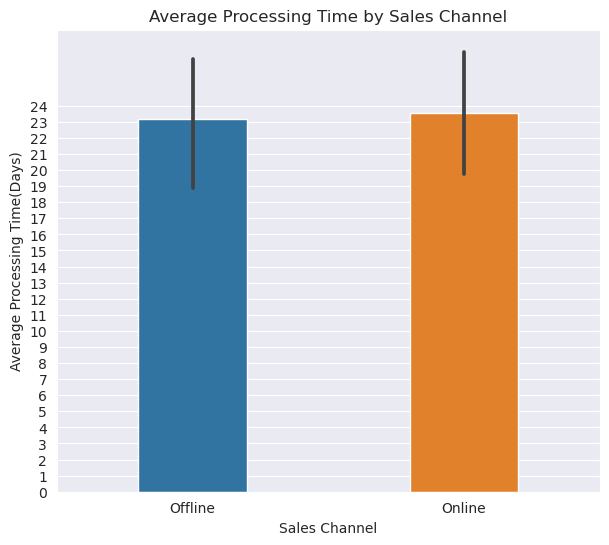

In [81]:
plt.figure(figsize=(7, 6))

sns.barplot(data= data, x= data['Sales Channel'], y=data['Processing Time'].dt.days, width= 0.4 )

plt.title('Average Processing Time by Sales Channel')
plt.xlabel('Sales Channel')
plt.yticks(np.arange(0,25,1))
plt.ylabel('Average Processing Time(Days)')

plt.show()



In [82]:
group_item_type= data.groupby(data['Item Type'])['Total Revenue'].sum()

highest_sales_revenue_item_type= group_item_type.idxmax()
lowest_sales_revenue_item_type= group_item_type.idxmin()

print("{'Highest Sales Revenue By Item Type':", highest_sales_revenue_item_type, "\n'Lowest Sales Revenue By Item Type':", lowest_sales_revenue_item_type, "}")

{'Highest Sales Revenue By Item Type': Cosmetics 
'Lowest Sales Revenue By Item Type': Fruits }


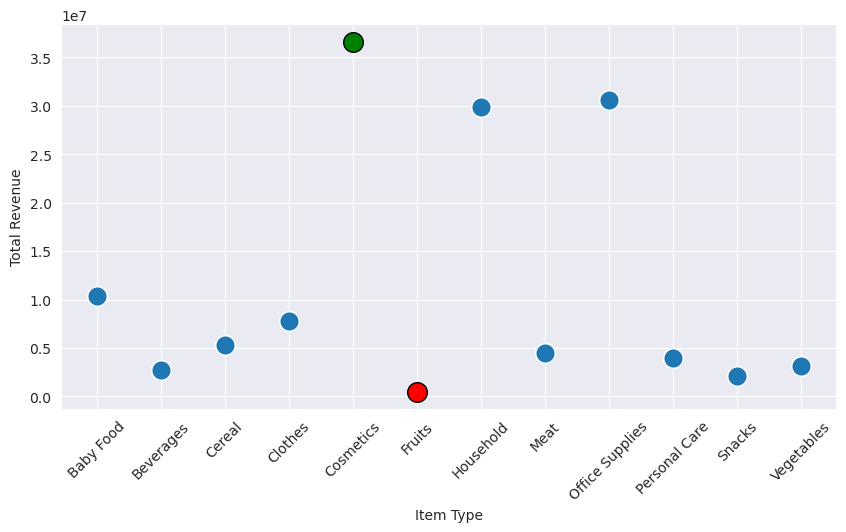

In [83]:
plt.figure(figsize=(10,5))

# Highlight Max Value
sns.scatterplot(x=group_item_type.index, y=group_item_type, s=200)
max_index = group_item_type.idxmax()
plt.scatter(x=max_index, y=group_item_type[max_index], s=200, color='Green', edgecolor='black')

# Highlight the minimum value
min_index = group_item_type.idxmin()
plt.scatter(x=min_index, y=group_item_type[min_index], s=200, color='RED', edgecolor='black')

plt.yticks(rotation= 0)
plt.xticks(rotation= 45)
plt.show()

In [84]:
Diff_regions_by_order_priority= data.groupby(data['Region'])['Order Priority'].value_counts()
Diff_regions_by_order_priority

Region                             Order Priority
Asia                               L                  4
                                   H                  3
                                   M                  2
                                   C                  2
Australia and Oceania              H                  5
                                   C                  4
                                   L                  1
                                   M                  1
Central America and the Caribbean  L                  2
                                   H                  2
                                   C                  2
                                   M                  1
Europe                             H                  7
                                   L                  6
                                   C                  5
                                   M                  4
Middle East and North Africa       M                  

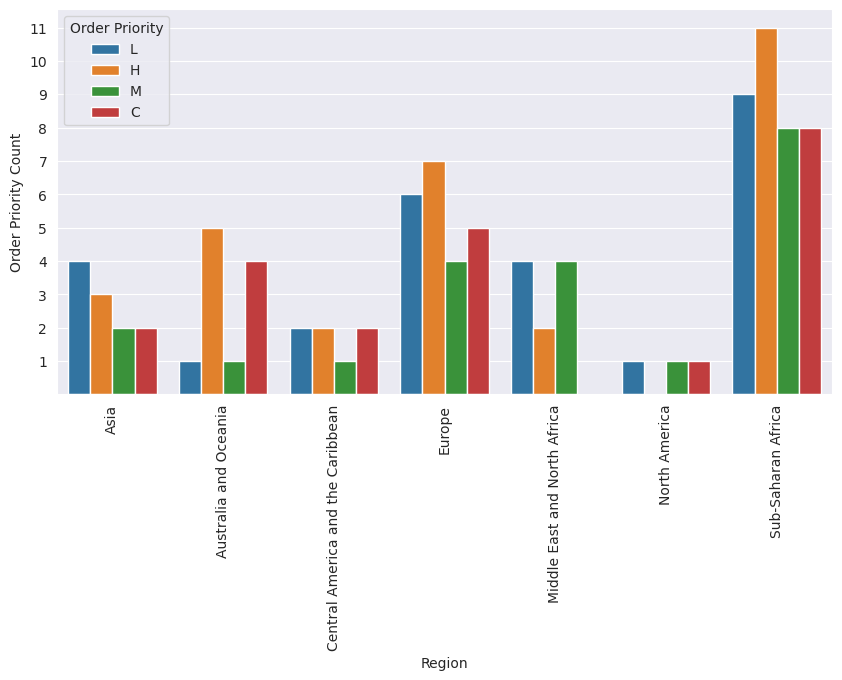

In [85]:
Diff_regions_by_order_priority= data.groupby(data['Region'])['Order Priority'].value_counts().reset_index(name='Order Priority Count')
plt.figure(figsize= (10,5))
sns.barplot(data= Diff_regions_by_order_priority, x= 'Region', y= 'Order Priority Count', hue= 'Order Priority')
plt.xticks(rotation= 90)
plt.yticks(np.arange(1,12,1))

plt.show()

In [86]:
Correlation_Unit_Price_Total_Profit= data['Unit Price'].corr(data['Total Profit'])

print("Correlation between Unit Price and Total Profit:", Correlation_Unit_Price_Total_Profit)


Correlation between Unit Price and Total Profit: 0.5573652488121267


<function matplotlib.pyplot.show(close=None, block=None)>

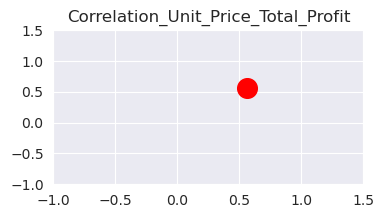

In [87]:
plt.figure(figsize=(4,2))
plt.scatter(x= Correlation_Unit_Price_Total_Profit, y= Correlation_Unit_Price_Total_Profit, s= 200, color= 'RED' )
plt.xticks(np.arange(-1,2,0.5))
plt.yticks(np.arange(-1,2,0.5))
plt.title('Correlation_Unit_Price_Total_Profit')

plt.show

In [88]:
month_names= {1: 'JAN',
              2: 'FEB',
              3: 'MAR',
              4: 'APR',
              5: 'MAY',
              6: 'JUN',
              7: 'JUL',
              8: 'AUG',
              9: 'SEPT',
             10: 'OCT',
             11: 'NOV',
             12: 'DEC'}
monthly_sales = data.groupby(data['Order Date'].dt.month)['Total Revenue'].sum()
monthly_sales.index= monthly_sales.index.map(month_names)

monthly_sales

Order Date
JAN     10482467.12
FEB     24740517.77
MAR      2274823.87
APR     16187186.33
MAY     13215739.99
JUN      5230325.77
JUL     15669518.50
AUG      1128164.91
SEPT     5314762.56
OCT     15287576.61
NOV     20568222.76
DEC      7249462.12
Name: Total Revenue, dtype: float64

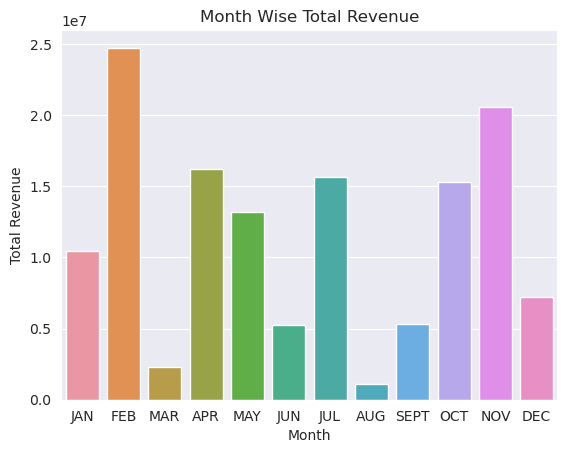

In [89]:
sns.barplot(x= monthly_sales.index, y= monthly_sales)
plt.title('Month Wise Total Revenue')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.show()


In [90]:
Diff_countries_by_unit_sold= data.groupby(data['Country'])['Units Sold'].sum().reset_index(name= 'Unit Sold')
pd.set_option('display.max_rows',None)
Diff_countries_by_unit_sold

,Country,Unit Sold
0,Albania,2269
1,Angola,4187
2,Australia,12995
3,Austria,2847
4,Azerbaijan,9255
5,Bangladesh,8263
6,Belize,5498
7,Brunei,6708
8,Bulgaria,5660
9,Burkina Faso,8082


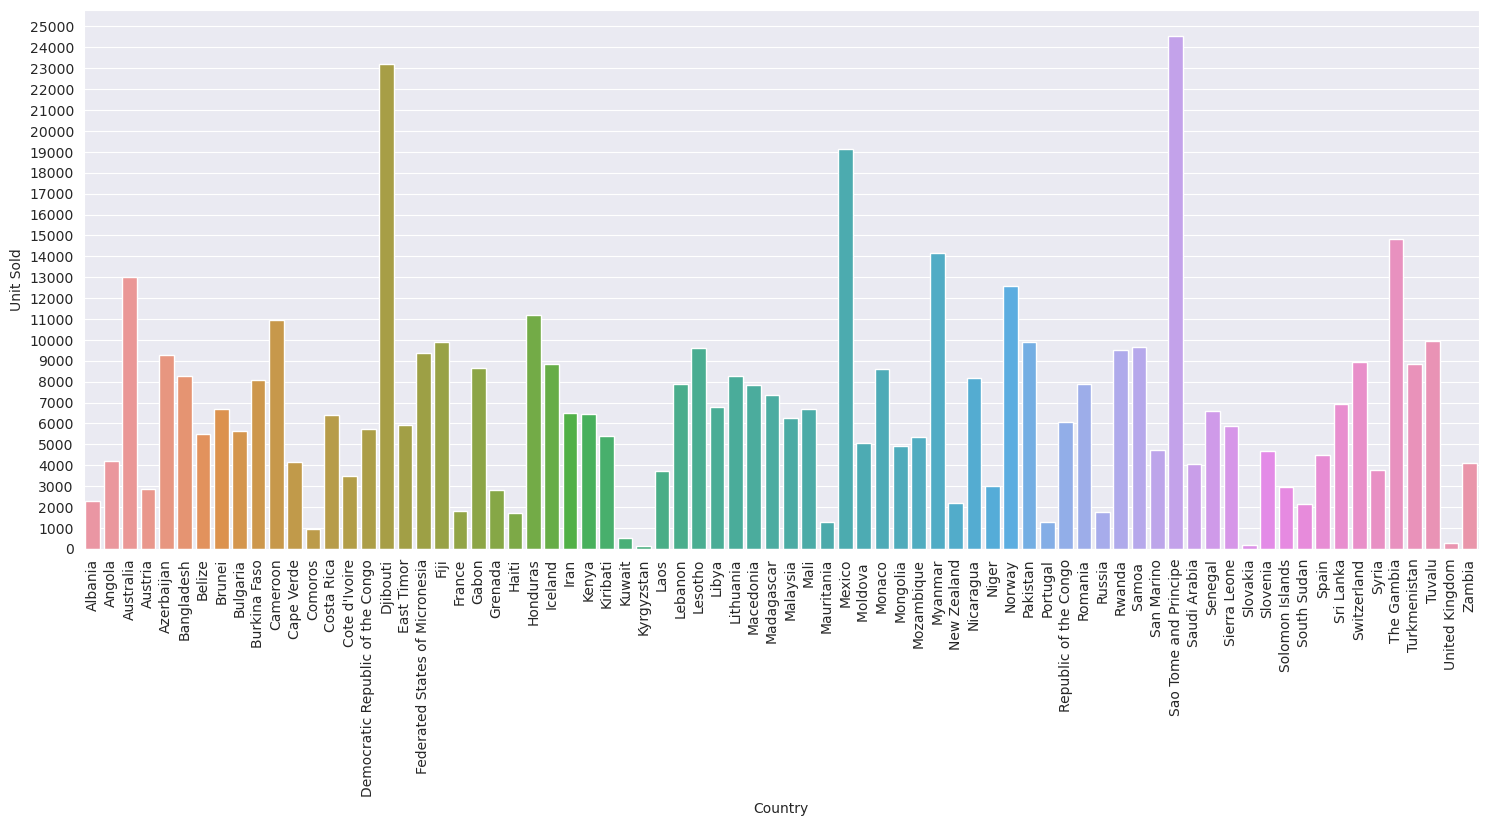

In [91]:
plt.figure(figsize= (18,7))
sns.barplot( data= Diff_countries_by_unit_sold, x= 'Country', y= 'Unit Sold')
plt.xticks(rotation= 90)
plt.yticks(np.arange(0,26000,1000))
plt.show()

In [92]:


#Other Queries:

#How does the total sales revenue vary across different countries?

#What is the distribution of unit prices for each item type?

#Which sales channel has the highest average unit price?

#Are there any outliers in the total cost distribution?

#How does the total profit vary across different item types?

#What is the average order processing time for each country?

#Which region has the highest average total revenue per order?

#Is there a relationship between the number of units sold and the total profit?

#How does the order priority vary based on the item type?

#Are there any trends or patterns in the order dates?


In [93]:
sales_revenue_by_countries=  data.groupby(data['Country']) ['Total Revenue'].sum().reset_index(name= 'Total Revenue')
sales_revenue_by_countries

,Country,Total Revenue
0,Albania,247956.32
1,Angola,2798046.49
2,Australia,2489933.49
3,Austria,1244708.40
4,Azerbaijan,4478800.21
5,Bangladesh,902980.64
6,Belize,600821.44
7,Brunei,4368316.68
8,Bulgaria,2779199.71
9,Burkina Faso,1245112.92


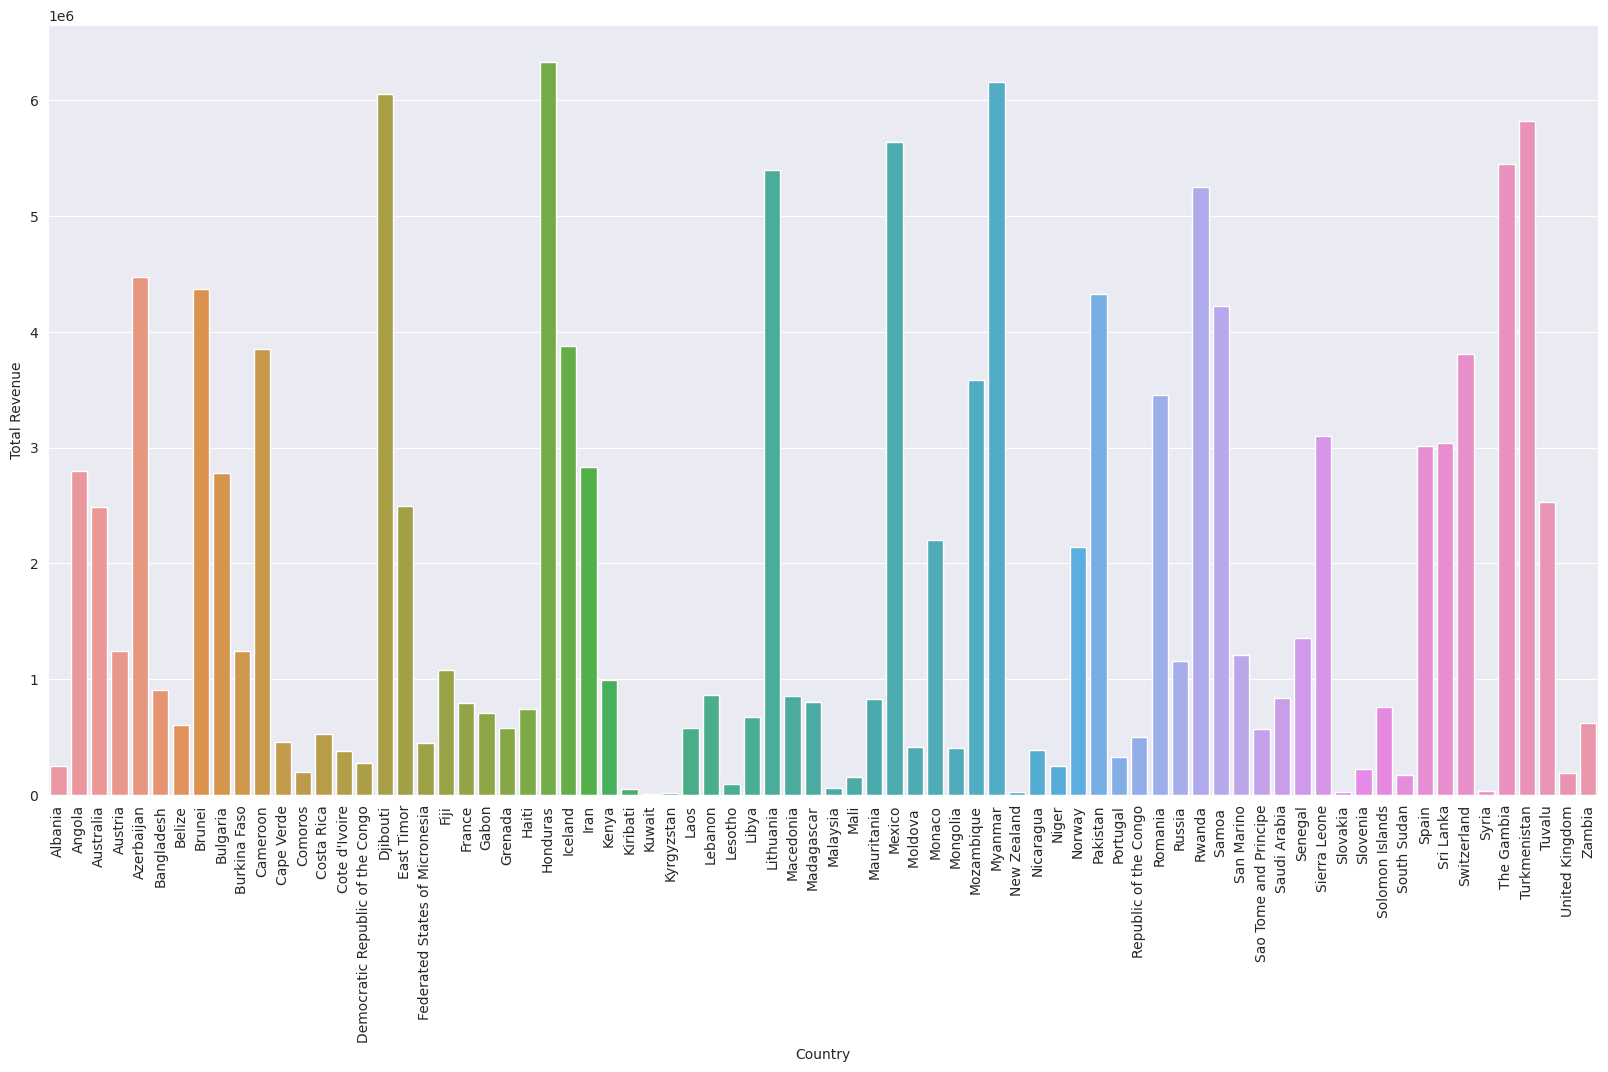

In [94]:
plt.figure(figsize=(20,10))
sns.barplot(x= sales_revenue_by_countries['Country'], y= sales_revenue_by_countries['Total Revenue'])
plt.xticks(rotation= 90)
plt.show()

In [95]:
unit_price_and_item_type_distribution= data.groupby(data['Item Type'])['Unit Price'].sum().reset_index(name= 'Unit Price')
unit_price_and_item_type_distribution

,Item Type,Unit Price
0,Baby Food,1786.96
1,Beverages,379.60
2,Cereal,1439.90
3,Clothes,1420.64
4,Cosmetics,5683.60
5,Fruits,93.30
6,Household,6014.43
7,Meat,843.78
8,Office Supplies,7814.52
9,Personal Care,817.30


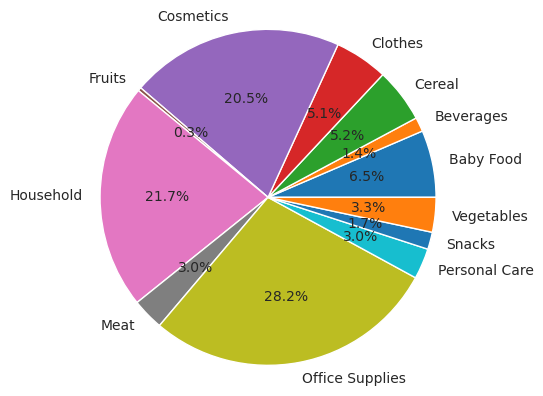

In [96]:
plt.pie(x= unit_price_and_item_type_distribution['Unit Price'], labels= unit_price_and_item_type_distribution['Item Type'],autopct='%1.1f%%')
plt.axis('equal')
plt.show()

In [97]:
Highest_avg_unit_price_for_sales_channel= data.groupby(data['Sales Channel']) ['Unit Price'].mean().reset_index(name= 'new')
Highest_avg_unit_price_for_sales_channel



,Sales Channel,new
0,Offline,310.7206
1,Online,242.8020


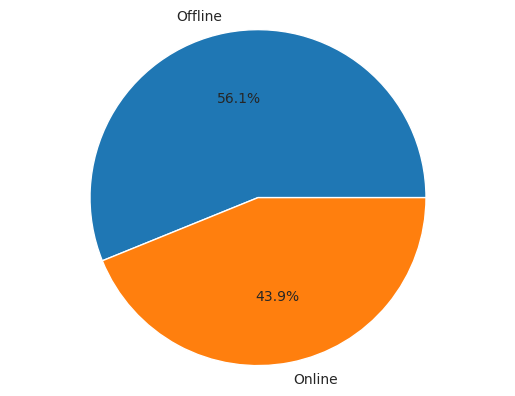

In [98]:
plt.pie(x= Highest_avg_unit_price_for_sales_channel['new'],labels=Highest_avg_unit_price_for_sales_channel['Sales Channel'], autopct= '%1.1f%%')
plt.axis('equal')
plt.show()

In [99]:
q1= data['Total Cost'].quantile(0.25)
q3= data['Total Cost'].quantile(0.75)

iqr= q3-q1

lower_fence= q1-1.5*iqr
upper_fence= q3+1.5*iqr

outliers= data[(data['Total Cost']<lower_fence)| (data['Total Cost']>upper_fence)].reset_index(drop= True)
outliers


,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Processing Time
0,Central America and the Caribbean,Honduras,Household,Offline,H,2017-02-08,522840487,2017-02-13,8974,668.27,502.54,5997054.98,4509793.96,1487261.02,5 days
1,Asia,Myanmar,Household,Offline,H,2015-01-16,177713572,2015-03-01,8250,668.27,502.54,5513227.50,4145955.0,1367272.50,44 days
2,Europe,Lithuania,Office Supplies,Offline,H,2010-10-24,166460740,2010-11-17,8287,651.21,524.96,5396577.27,4350343.52,1046233.75,24 days


TypeError: boolean value of NA is ambiguous

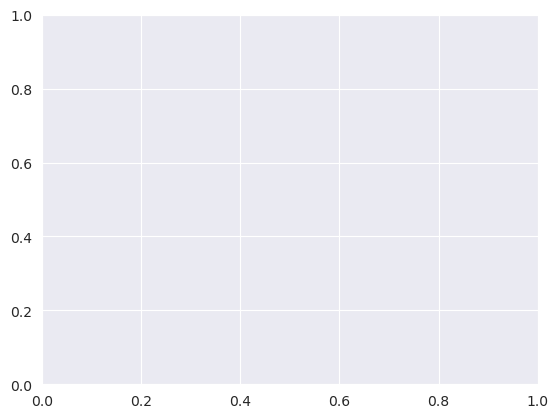

In [100]:
plt.boxplot(data['Total Cost'])
plt.title('Boxplot of Total Cost')
plt.show()


In [ ]:
total_profit_and_diff_item_types= data.groupby(data['Item Type'])['Total Profit'].sum().reset_index(name='Total Profit')
total_profit_and_diff_item_types

In [ ]:
Avg_Processing_Time_by_country= data.groupby(data['Country'])['Processing Time'].mean()
Avg_Processing_Time_by_country

In [ ]:
data['avg total revenue']= data['Total Revenue']/data['Units Sold']
highest_avg_total_revenue_per_order= data.groupby(data['Region']) ['avg total revenue'].mean()
highest_avg_total_revenue_per_order.sort_values(ascending=True)
highest_avg_total_revenue_per_order.head(1)


In [ ]:
Correlation_unit_sold_and_total_profit= data['Units Sold'].corr(data['Total Profit'])
print(f"Correlation coefficient: {Correlation_unit_sold_and_total_profit}")


In [ ]:
Order_priority_vary_on_item_type= data.groupby(data['Order Priority'])['Item Type'].value_counts().reset_index(name= 'No. Of Items')
Order_priority_vary_on_item_type